## SEIR model in R using deSolve

*Author*: Lloyd Chapman @LloydChapman

*Date*: 2018-10-01

In [1]:
# Load deSolve library
library(deSolve)

In [2]:
# Function to return derivatives of SEIR model
seir_ode<-function(t,Y,par){
  S<-Y[1]
  E<-Y[2]
  I<-Y[3]
  R<-Y[4]
  
  beta<-par[1]
  sigma<-par[2]
  gamma<-par[3]
  mu<-par[4]
  
  dYdt<-vector(length=3)
  dYdt[1]=mu-beta*I*S-mu*S
  dYdt[2]=beta*I*S-(sigma+mu)*E
  dYdt[3]=sigma*E-(gamma+mu)*I
  
  return(list(dYdt))
}

In [3]:
# Set parameter values
beta<-520/365;
sigma<-1/60;
gamma<-1/30;
mu<-774835/(65640000*365) # UK birth and population figures 2016
init<-c(0.8,0.1,0.1)
t<-seq(0,365)
par<-c(beta,sigma,gamma,mu)
# Solve system using lsoda
sol<-lsoda(init,t,seir_ode,par)

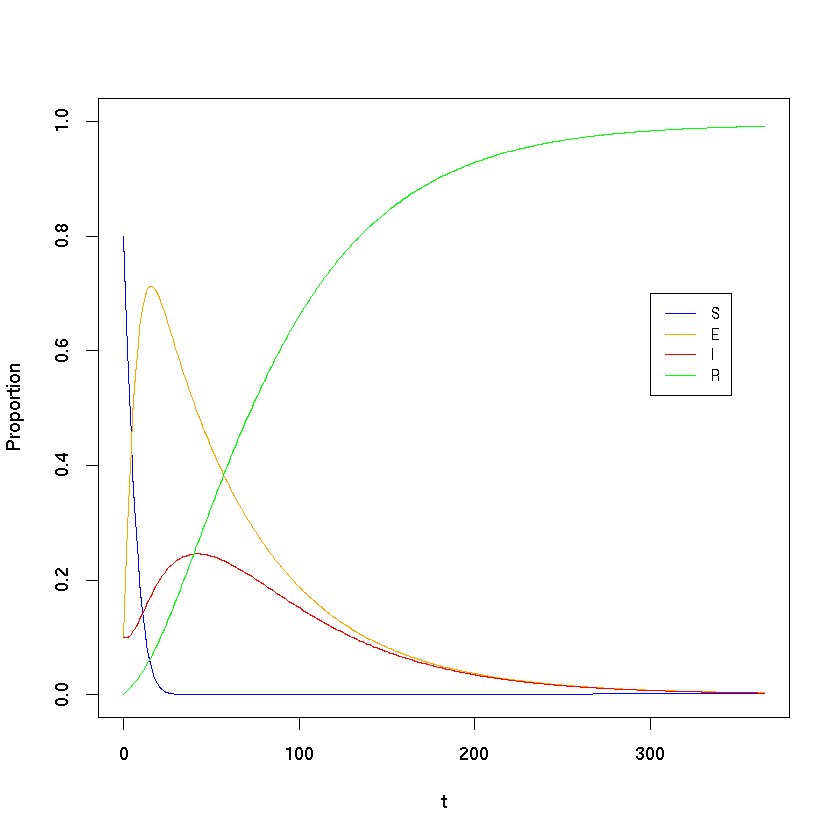

In [4]:
# Plot solution
plot(t,sol[,2],type="l",col="blue",ylim=c(0,1),ylab="Proportion")
lines(t,sol[,3],col="orange")
lines(t,sol[,4],col="red")  
lines(t,1-rowSums(sol[,2:4]),col="green")
legend(300,0.7,legend=c("S","E","I","R"),col=c("blue","orange","red","green"), lty=1, cex=0.8)